In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = "../data/raw-data/gender/employment data/Gender_paid_unpaid.csv"
# Load the CSV file into a DataFrame
df = pd.read_csv(file_path)
df.head(10)

,COU,Country,Indicator,Sex,Unit,Value
0,AUS,Australia,"Time spent in unpaid work, by sex",Men,Minutes per day,171.6
1,AUS,Australia,"Time spent in unpaid work, by sex",Women,Minutes per day,311.0
2,AUS,Australia,"Time spent in paid work, by sex",Men,Minutes per day,304.1
3,AUS,Australia,"Time spent in paid work, by sex",Women,Minutes per day,172.0
4,AUT,Austria,"Time spent in unpaid work, by sex",Men,Minutes per day,135.3
5,AUT,Austria,"Time spent in unpaid work, by sex",Women,Minutes per day,269.2
6,AUT,Austria,"Time spent in paid work, by sex",Men,Minutes per day,364.8
7,AUT,Austria,"Time spent in paid work, by sex",Women,Minutes per day,248.8
8,BEL,Belgium,"Time spent in unpaid work, by sex",Men,Minutes per day,144.2
9,BEL,Belgium,"Time spent in unpaid work, by sex",Women,Minutes per day,237.3


In [3]:
# Drop the 'Unit' column
df = df.drop(columns=['Unit'])

# Rename the 'Value' column to 'min_per_day'
df = df.rename(columns={'Value': 'min_per_day'})
df.head(10)

,COU,Country,Indicator,Sex,min_per_day
0,AUS,Australia,"Time spent in unpaid work, by sex",Men,171.6
1,AUS,Australia,"Time spent in unpaid work, by sex",Women,311.0
2,AUS,Australia,"Time spent in paid work, by sex",Men,304.1
3,AUS,Australia,"Time spent in paid work, by sex",Women,172.0
4,AUT,Austria,"Time spent in unpaid work, by sex",Men,135.3
5,AUT,Austria,"Time spent in unpaid work, by sex",Women,269.2
6,AUT,Austria,"Time spent in paid work, by sex",Men,364.8
7,AUT,Austria,"Time spent in paid work, by sex",Women,248.8
8,BEL,Belgium,"Time spent in unpaid work, by sex",Men,144.2
9,BEL,Belgium,"Time spent in unpaid work, by sex",Women,237.3


In [4]:
replace_indicator = {
    "Time spent in unpaid work, by sex": "time_unpaid",
    "Time spent in paid work, by sex": "time_paid"
}

# Replace the values in the 'Indicator' column
df['Indicator'] = df['Indicator'].replace(replace_indicator)
df.head(10)

,COU,Country,Indicator,Sex,min_per_day
0,AUS,Australia,time_unpaid,Men,171.6
1,AUS,Australia,time_unpaid,Women,311.0
2,AUS,Australia,time_paid,Men,304.1
3,AUS,Australia,time_paid,Women,172.0
4,AUT,Austria,time_unpaid,Men,135.3
5,AUT,Austria,time_unpaid,Women,269.2
6,AUT,Austria,time_paid,Men,364.8
7,AUT,Austria,time_paid,Women,248.8
8,BEL,Belgium,time_unpaid,Men,144.2
9,BEL,Belgium,time_unpaid,Women,237.3


In [5]:
df.to_csv('../data/clean_data/clean_gender_paid_unpaid.csv', index=False)

In [6]:
print("Descriptive statistics:")
print(df.describe())

Descriptive statistics:
       min_per_day
count   136.000000
mean    234.006618
std      82.679826
min      40.800000
25%     170.375000
50%     236.250000
75%     289.200000
max     478.300000


In [7]:
# Count the number of occurrences of each unique value in the "Country" column
counts = df['Country'].value_counts()
counts

Australia                       4
China (People's Republic of)    4
Portugal                        4
Spain                           4
Sweden                          4
Türkiye                         4
United Kingdom                  4
United States                   4
Estonia                         4
Austria                         4
India                           4
Latvia                          4
Slovenia                        4
South Africa                    4
Luxembourg                      4
Lithuania                       4
Poland                          4
Norway                          4
New Zealand                     4
Netherlands                     4
Mexico                          4
Korea                           4
Japan                           4
Italy                           4
Ireland                         4
Hungary                         4
Greece                          4
Germany                         4
France                          4
Finland       

In [8]:
df.shape

(136, 5)

In [9]:
if df.isnull().any().any():
    print("There are empty or missing values in dataset.")
else:
    print("There are no empty or missing values in dataset.")

There are no empty or missing values in dataset.


In [10]:
# Calculate the average time spent in paid and unpaid work for both men and women across all countries
average_time = df.groupby(['Indicator', 'Sex'])['min_per_day'].mean()
print("Average time spent in paid and unpaid work for both men and women across all countries:")
print(average_time)


Average time spent in paid and unpaid work for both men and women across all countries:
Indicator    Sex  
time_paid    Men      321.382353
             Women    218.238235
time_unpaid  Men      131.650000
             Women    264.755882
Name: min_per_day, dtype: float64


In [11]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 100)

# Calculate the average time spent in paid and unpaid work for each country
average_time_country = df.groupby(['Country', 'Indicator', 'Sex'])['min_per_day'].mean()
print("\nAverage time spent in paid and unpaid work for each country:")
print(average_time_country.to_string())


Average time spent in paid and unpaid work for each country:
Country                       Indicator    Sex  
Australia                     time_paid    Men      304.1
                                           Women    172.0
                              time_unpaid  Men      171.6
                                           Women    311.0
Austria                       time_paid    Men      364.8
                                           Women    248.8
                              time_unpaid  Men      135.3
                                           Women    269.2
Belgium                       time_paid    Men      273.7
                                           Women    199.2
                              time_unpaid  Men      144.2
                                           Women    237.3
Canada                        time_paid    Men      340.5
                                           Women    268.3
                              time_unpaid  Men      148.1
                   

In [12]:
# Find the top 3 countries with the highest difference between men's and women's time spent in paid work
paid_work_diff = df[df['Indicator'] == 'time_paid'].pivot_table(index=['Country'], columns='Sex', values='min_per_day')
paid_work_diff['difference'] = abs(paid_work_diff['Men'] - paid_work_diff['Women'])
top_3_paid_work_diff = paid_work_diff.nlargest(3, 'difference')
print("\nTop 3 countries with the highest difference between men's and women's time spent in paid work:")
print(top_3_paid_work_diff)


Top 3 countries with the highest difference between men's and women's time spent in paid work:
Sex        Men  Women  difference
Country                          
Mexico   478.3  236.3       242.0
Türkiye  358.3  133.9       224.4
India    390.6  184.7       205.9


In [13]:
# Find the top 3 countries with the highest difference between men's and women's time spent in unpaid work
unpaid_work_diff = df[df['Indicator'] == 'time_unpaid'].pivot_table(index=['Country'], columns='Sex', values='min_per_day')
unpaid_work_diff['difference'] = abs(unpaid_work_diff['Men'] - unpaid_work_diff['Women'])
top_3_unpaid_work_diff = unpaid_work_diff.nlargest(3, 'difference')
print("\nTop 3 countries with the highest difference between men's and women's time spent in unpaid work:")
print(top_3_unpaid_work_diff)



Top 3 countries with the highest difference between men's and women's time spent in unpaid work:
Sex        Men  Women  difference
Country                          
India     51.8  351.9       300.1
Türkiye   67.6  305.0       237.4
Portugal  96.3  328.2       231.9


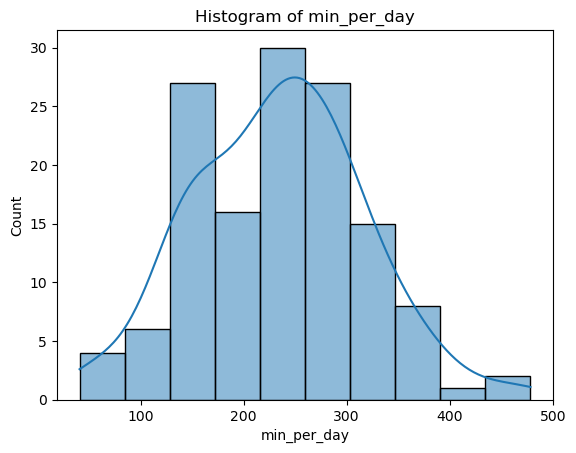

In [14]:
# Histograms for the `min_per_day` variable
plt.figure()
sns.histplot(data=df, x='min_per_day', kde=True)
plt.title("Histogram of min_per_day")
plt.show()


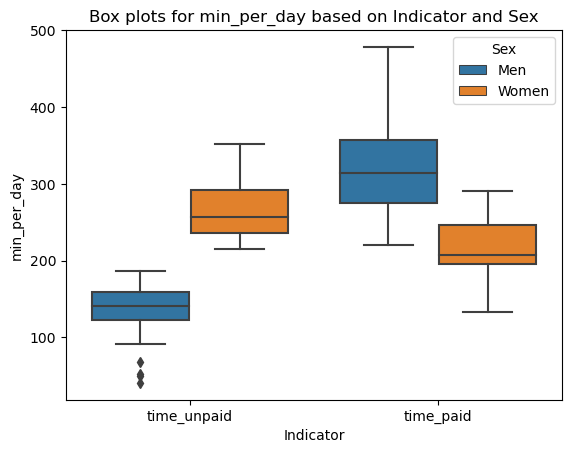

In [15]:
# Box plots for `min_per_day` based on `Indicator` and `Sex`
plt.figure()
sns.boxplot(data=df, x='Indicator', y='min_per_day', hue='Sex')
plt.title("Box plots for min_per_day based on Indicator and Sex")
plt.show()

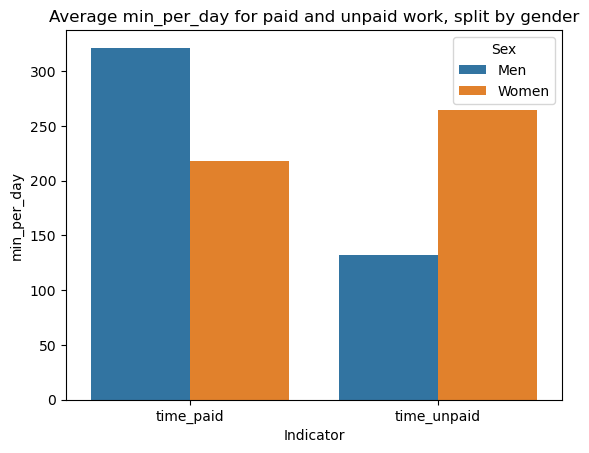

In [16]:
# Bar plots comparing average `min_per_day` for paid and unpaid work, split by gender
average_time = df.groupby(['Indicator', 'Sex'])['min_per_day'].mean().reset_index()
plt.figure()
sns.barplot(data=average_time, x='Indicator', y='min_per_day', hue='Sex')
plt.title("Average min_per_day for paid and unpaid work, split by gender")
plt.show()

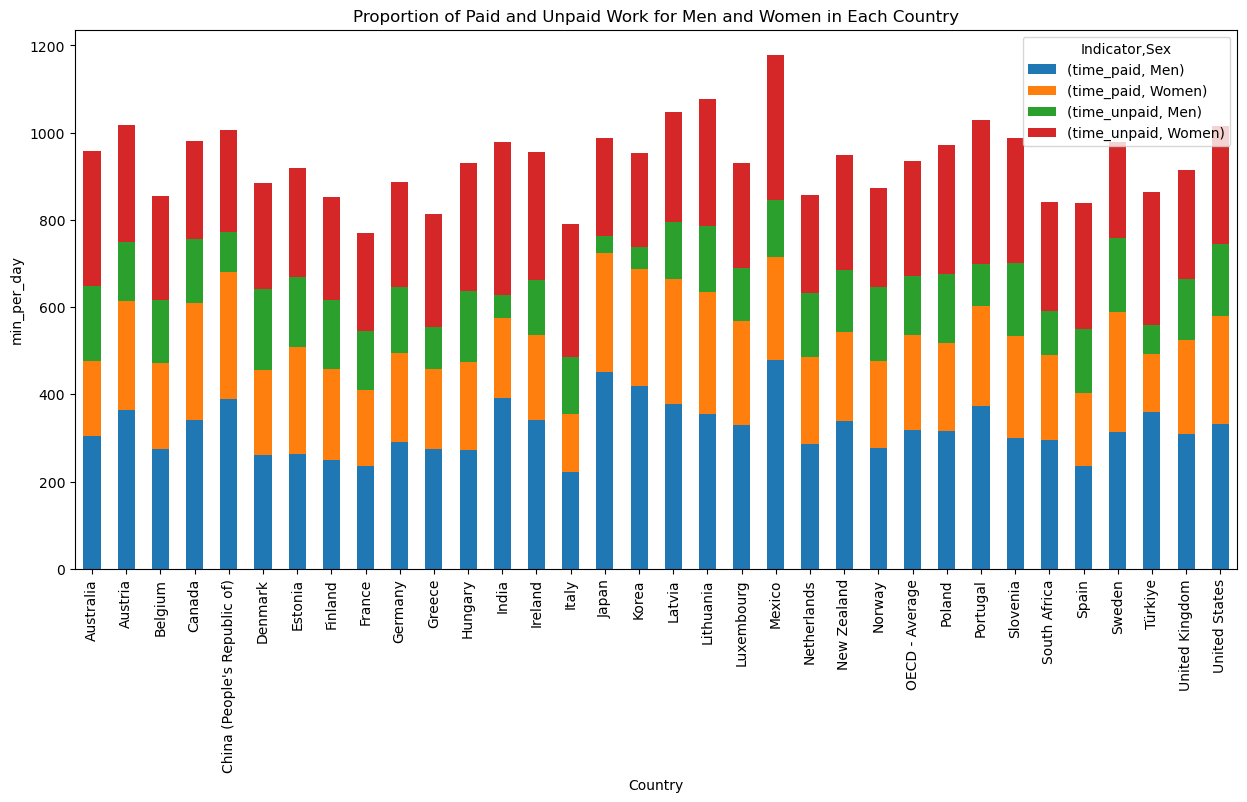

In [17]:
# Stacked bar plot
stacked_bar_data = df.pivot_table(index=['Country'], columns=['Indicator', 'Sex'], values='min_per_day', aggfunc='mean')
stacked_bar_data.plot(kind='bar', stacked=True, figsize=(15, 7))
plt.title("Proportion of Paid and Unpaid Work for Men and Women in Each Country")
plt.ylabel("min_per_day")
plt.show()

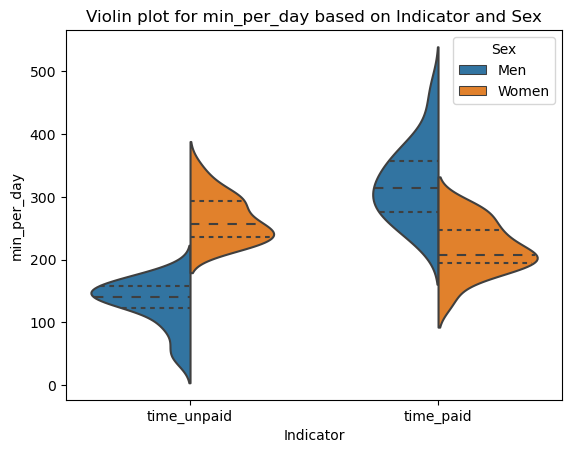

In [18]:
# Violin plot
plt.figure()
sns.violinplot(data=df, x='Indicator', y='min_per_day', hue='Sex', split=True, inner="quartile")
plt.title("Violin plot for min_per_day based on Indicator and Sex")
plt.show()
